<a href="https://colab.research.google.com/github/savastakan/codes/blob/main/Custom_OCR_Text_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom OCR - text recognition

# Importing the libraries

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
from google.colab.patches import cv2_imshow

# Loading the neural network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
network = load_model('/content/drive/MyDrive/Cursos - recursos/OCR with Python/Models/network')
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

# Loading the test image

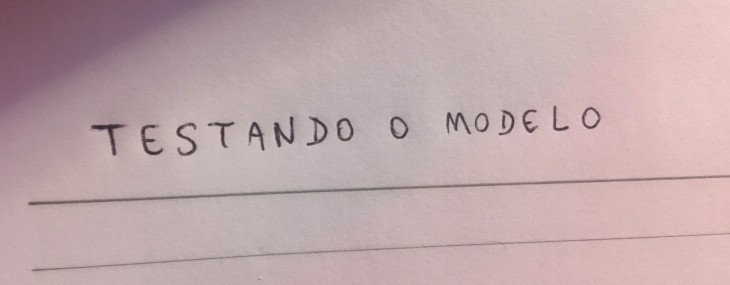

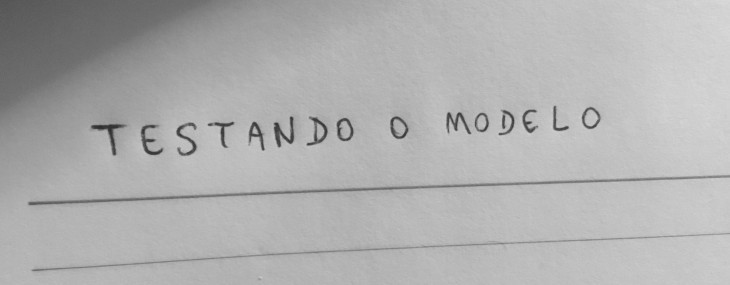

In [ ]:
img = cv2.imread('/content/test-manuscript01.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Pre-processing the image

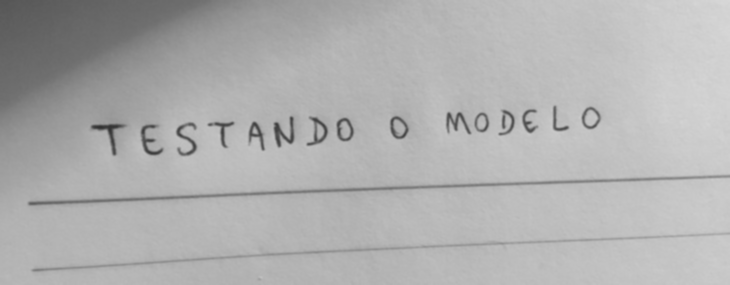

In [ ]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(blur)

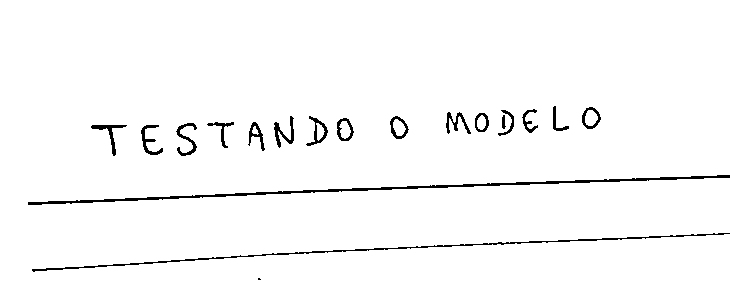

In [ ]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive)

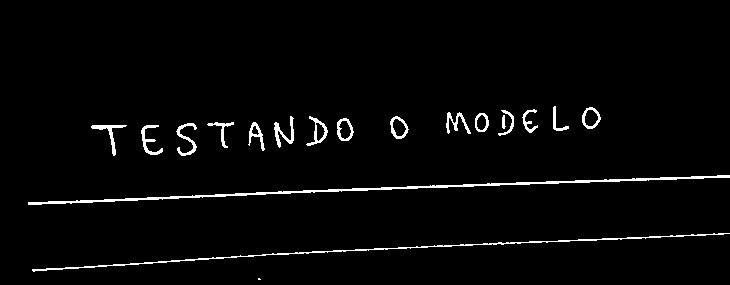

In [ ]:
invertion = 255 - adaptive
cv2_imshow(invertion)

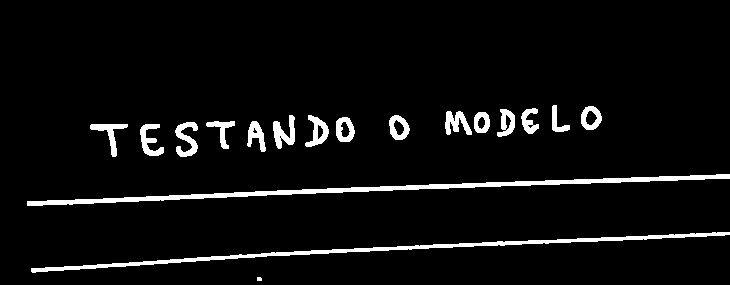

In [ ]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
cv2_imshow(dilation)

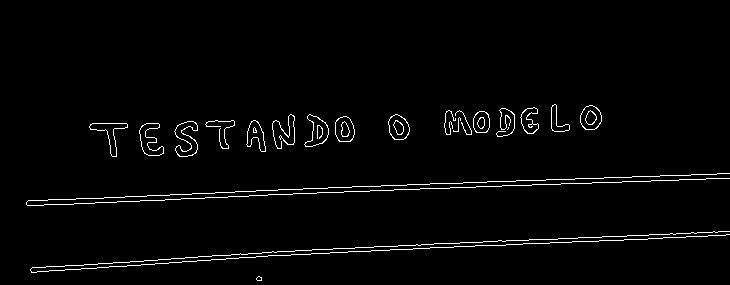

In [ ]:
edges = cv2.Canny(dilation, 40, 150)
cv2_imshow(edges)

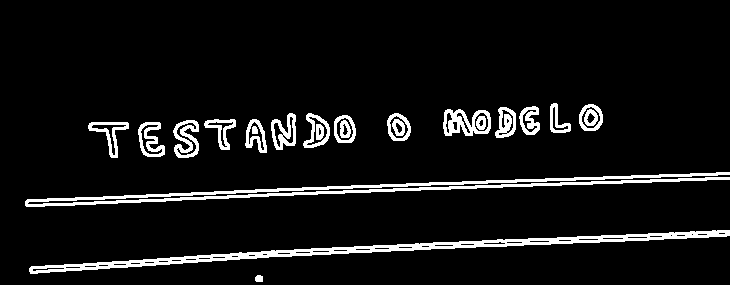

In [ ]:
dilation = cv2.dilate(edges, np.ones((3,3)))
cv2_imshow(dilation)

# Contour detection

In [ ]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method = 'left-to-right')[0]
  return conts

In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
conts

(array([[[716, 174]],
 
        [[715, 175]],
 
        [[690, 175]],
 
        [[689, 176]],
 
        [[659, 176]],
 
        [[658, 177]],
 
        [[631, 177]],
 
        [[630, 178]],
 
        [[603, 178]],
 
        [[602, 179]],
 
        [[574, 179]],
 
        [[573, 180]],
 
        [[545, 180]],
 
        [[544, 181]],
 
        [[515, 181]],
 
        [[514, 182]],
 
        [[486, 182]],
 
        [[485, 183]],
 
        [[462, 183]],
 
        [[461, 184]],
 
        [[429, 184]],
 
        [[428, 185]],
 
        [[406, 185]],
 
        [[405, 186]],
 
        [[380, 186]],
 
        [[379, 187]],
 
        [[351, 187]],
 
        [[350, 188]],
 
        [[327, 188]],
 
        [[326, 189]],
 
        [[302, 189]],
 
        [[301, 190]],
 
        [[277, 190]],
 
        [[276, 191]],
 
        [[255, 191]],
 
        [[254, 192]],
 
        [[234, 192]],
 
        [[233, 193]],
 
        [[214, 193]],
 
        [[213, 194]],
 
        [[191, 194]],
 
        [[190, 1

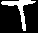

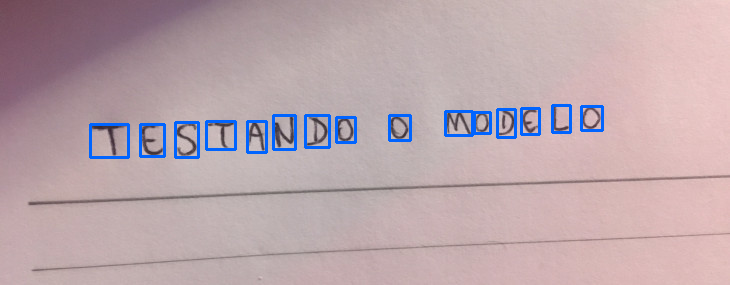

In [ ]:
min_w, max_w = 4, 160
min_h, max_h = 14, 140
img_copy = img.copy()
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  #print(x, y, w, h)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    roi = gray[y:y+h, x:x+w]
    #cv2_imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_copy)

# Processing the detected characters

## ROI extraction


In [ ]:
def extract_roi(img):
  roi = img[y:y + h, x:x + w]
  return roi

## Thresholding

In [ ]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

## Resizing

In [ ]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width = 28)
  else:
    resized = imutils.resize(img, height = 28)

  (h, w) = resized.shape
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value = (0,0,0))
  filled = cv2.resize(filled, (28,28))
  return filled

In [ ]:
(x, y, w, h) = cv2.boundingRect(conts[6])
print(x, y, w, h)
test_img = thresholding(gray[y:y+h, x:x+w])
cv2_imshow(test_img)
(h, w) = test_img.shape
print(h, w)
test_img2 = resize_img(test_img, w, h)
cv2_imshow(test_img2)
print(test_img2.shape)

247 121 19 31


31 19


(28, 28)


In [ ]:
cv2_imshow(cv2.resize(test_img, (28,28)))

## Normalization

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis = -1)
  return img

In [ ]:
test_img2.shape, normalization(test_img2).shape

((28, 28), (28, 28, 1))

## Processing the detections

In [ ]:
characters = []

In [ ]:
def process_box(gray, x, y, w, h):
  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)
  cv2_imshow(resized)
  normalized = normalization(resized)
  characters.append((normalized, (x, y, w, h)))

In [ ]:
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [ ]:
characters[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

In [ ]:
boxes = [box[1] for box in characters]
boxes

[(90, 124, 38, 33),
 (140, 124, 24, 32),
 (175, 122, 23, 35),
 (206, 121, 29, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (336, 117, 19, 25),
 (389, 115, 21, 25),
 (445, 111, 27, 24),
 (474, 112, 16, 21),
 (497, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (581, 106, 21, 24)]

In [ ]:
pixels = np.array([pixel[0] for pixel in characters], dtype = 'float32')

In [ ]:
pixels

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.14509805],
         [0.27450982],
         ...,
         [0.27450982],
         [0.14509805],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

# Recognition of characters

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list = digits + letters
characters_list = [l for l in characters_list]

In [ ]:
print(characters_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
pixels[0].shape

(28, 28, 1)

In [ ]:
pixels.shape

(15, 28, 28, 1)

In [ ]:
predictions = network.predict(pixels)

In [ ]:
predictions

array([[8.86984897e-16, 6.90980739e-09, 8.95819269e-12, 7.92568983e-15,
        5.56140897e-12, 1.61621145e-07, 3.54810591e-11, 1.26530704e-05,
        7.30943928e-09, 2.12835943e-07, 1.12030654e-12, 2.94073689e-11,
        1.16222211e-07, 2.62857514e-10, 3.44318254e-11, 2.31143034e-12,
        4.61243332e-07, 9.19123108e-14, 1.46554286e-12, 4.97067958e-06,
        3.58290180e-07, 5.62752955e-10, 1.82086564e-13, 1.45279340e-12,
        4.75827600e-09, 4.81567808e-09, 3.18954955e-17, 7.71851246e-12,
        8.44066719e-08, 9.99945760e-01, 4.24447308e-06, 6.09782672e-16,
        4.54192142e-16, 3.84572552e-09, 3.08065610e-05, 1.32789950e-07],
       [7.62506139e-20, 4.12058182e-16, 4.58683230e-19, 3.12833851e-36,
        2.08468912e-18, 8.58018864e-12, 4.44225316e-11, 6.04471001e-18,
        6.68092494e-14, 9.43195737e-17, 2.64742679e-17, 5.28734879e-13,
        1.93087342e-08, 1.03810622e-14, 9.88419652e-01, 1.15803313e-02,
        2.89492735e-11, 6.65111247e-17, 1.26401800e-18, 4.91417

In [ ]:
predictions.shape

(15, 36)

In [ ]:
boxes

[(90, 124, 38, 33),
 (140, 124, 24, 32),
 (175, 122, 23, 35),
 (206, 121, 29, 28),
 (247, 121, 19, 31),
 (273, 115, 22, 34),
 (305, 115, 24, 32),
 (336, 117, 19, 25),
 (389, 115, 21, 25),
 (445, 111, 27, 24),
 (474, 112, 16, 21),
 (497, 109, 18, 28),
 (521, 108, 18, 26),
 (552, 105, 18, 27),
 (581, 106, 21, 24)]

T  ->  99.99457597732544


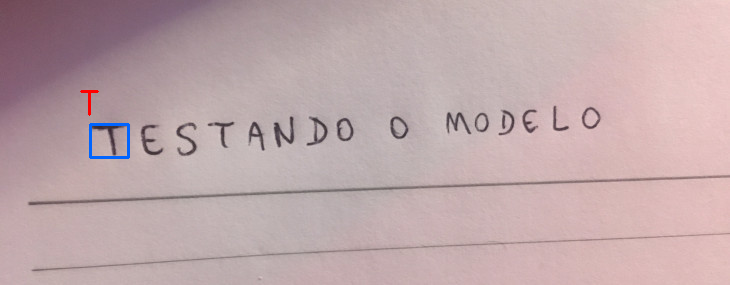

E  ->  98.84196519851685


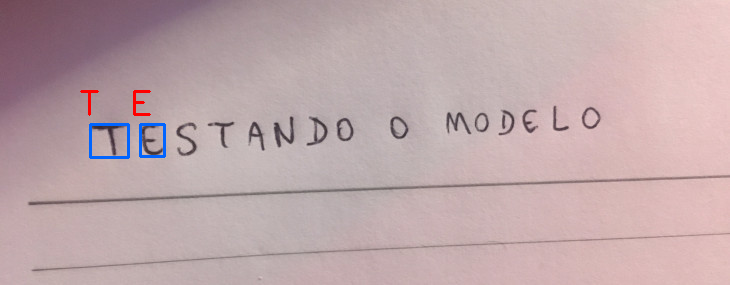

S  ->  82.53593444824219


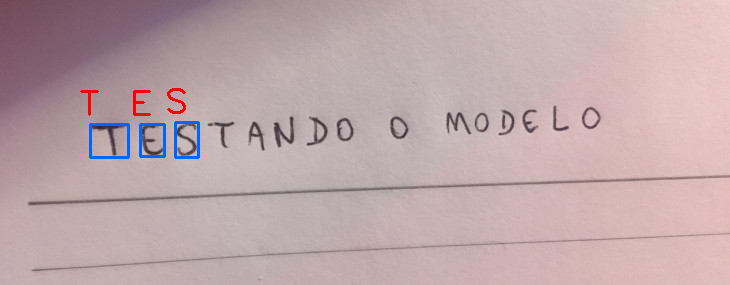

T  ->  99.98452663421631


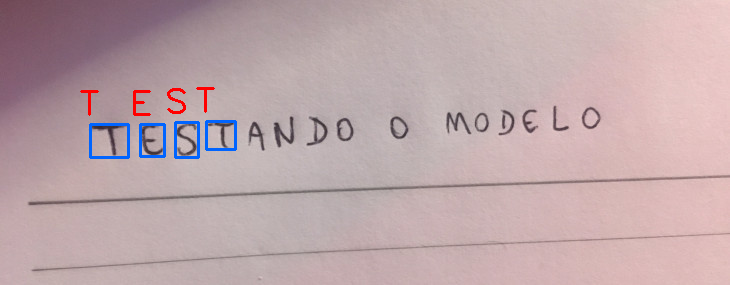

A  ->  99.99874830245972


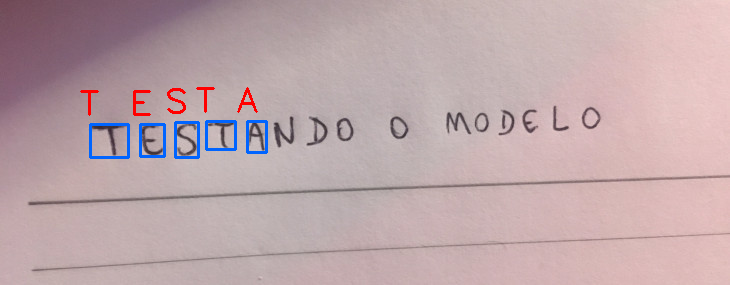

N  ->  99.99758005142212


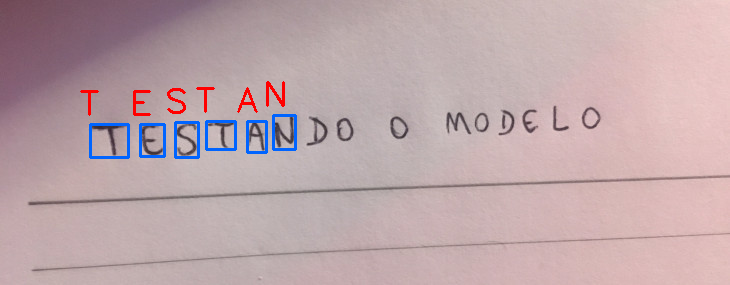

D  ->  99.9998688697815


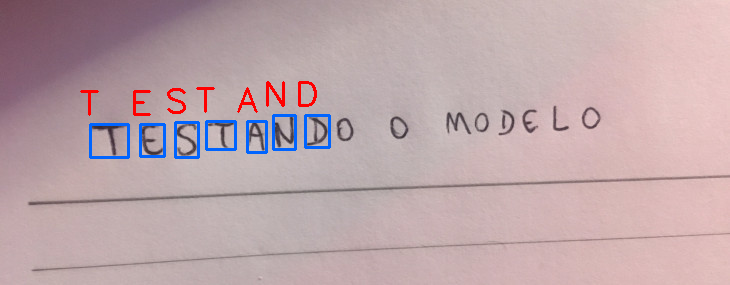

0  ->  36.84127628803253


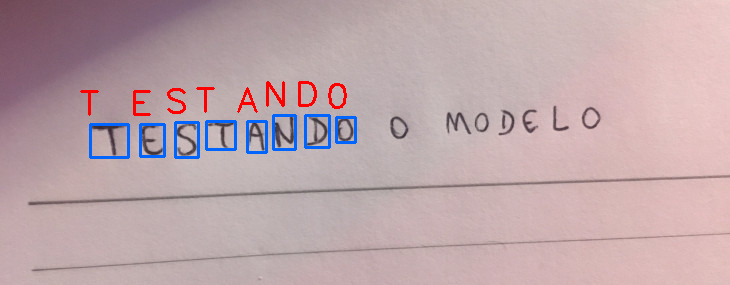

D  ->  87.50028014183044


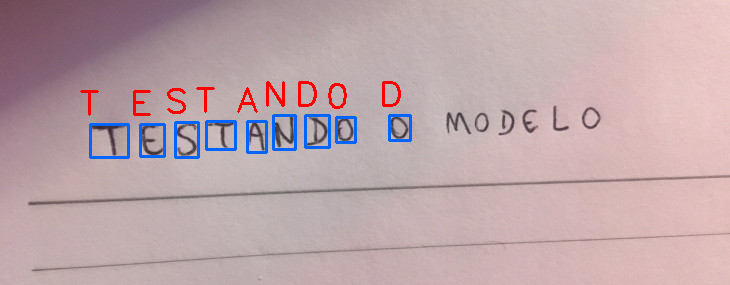

M  ->  96.39670252799988


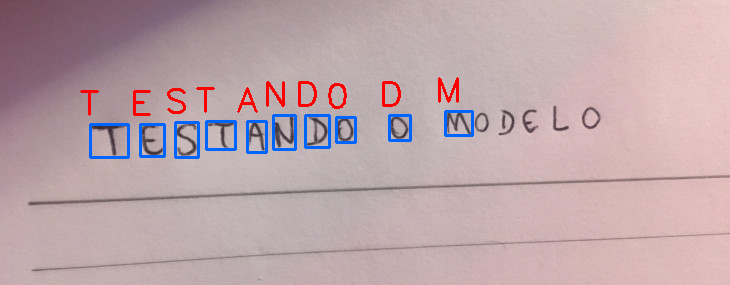

0  ->  60.11674404144287


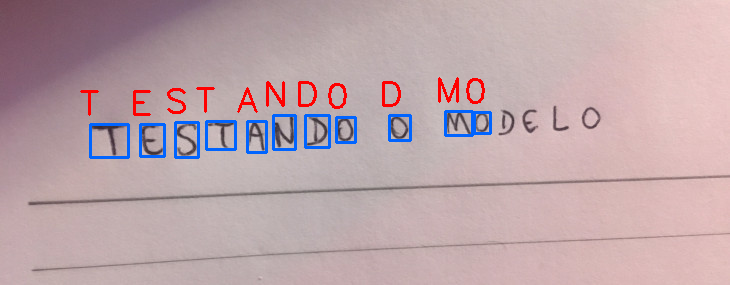

D  ->  99.80834722518921


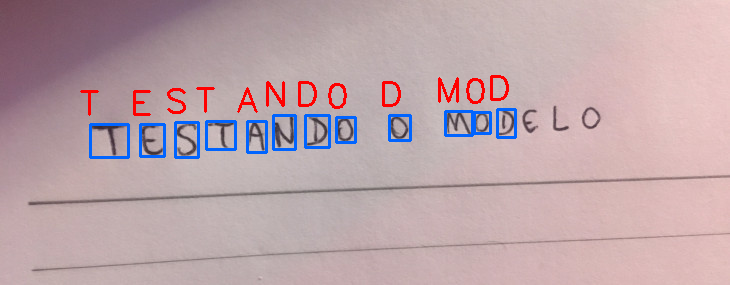

E  ->  99.98779296875


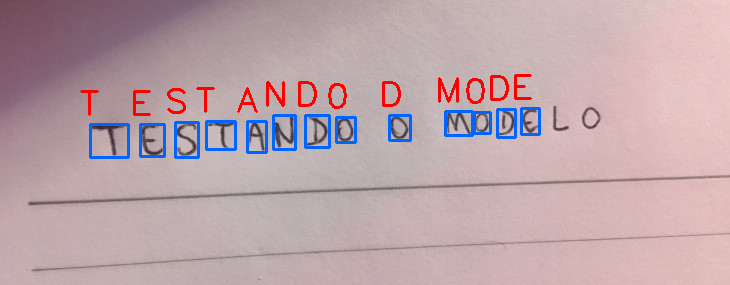

L  ->  99.99991655349731


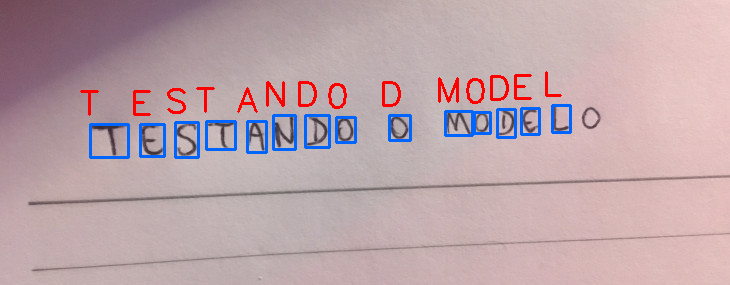

0  ->  68.17806959152222


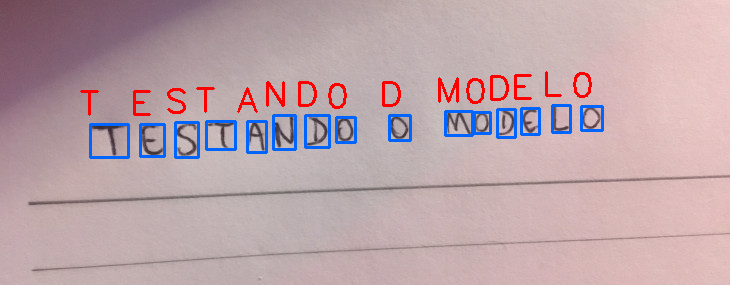

In [ ]:
img_copy = img.copy()
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  #print(i)
  probability = prediction[i]
  #print(probability)
  character = characters_list[i]
  #print(character)

  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(character, ' -> ', probability * 100)

  cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y + h, x - margin:x + w + margin]
  return roi

In [ ]:
conts = find_contours(dilation.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [ ]:
boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype='float32')
predictions = network.predict(pixels)

T  ->  99.9883770942688


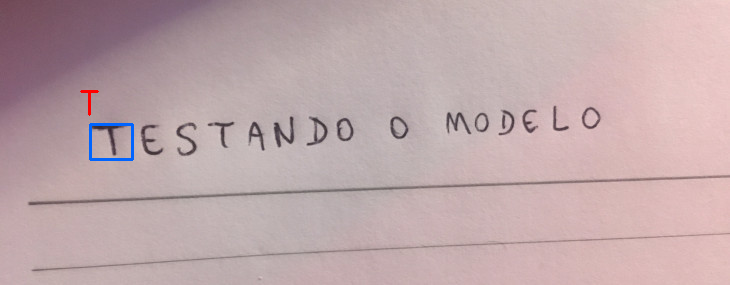

E  ->  99.99955892562866


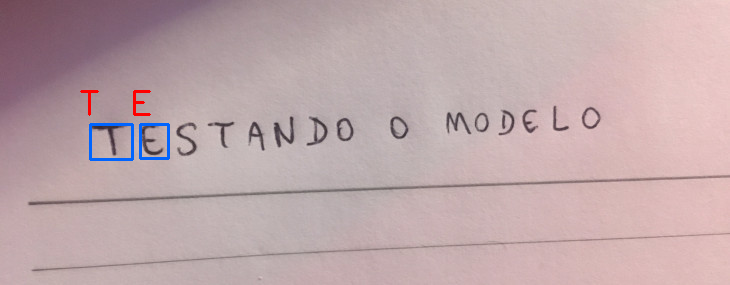

S  ->  91.74849390983582


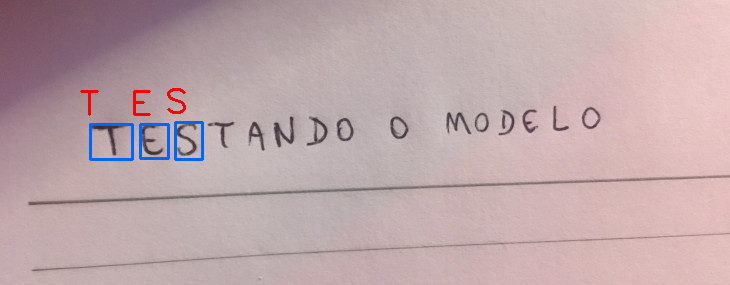

T  ->  99.9798834323883


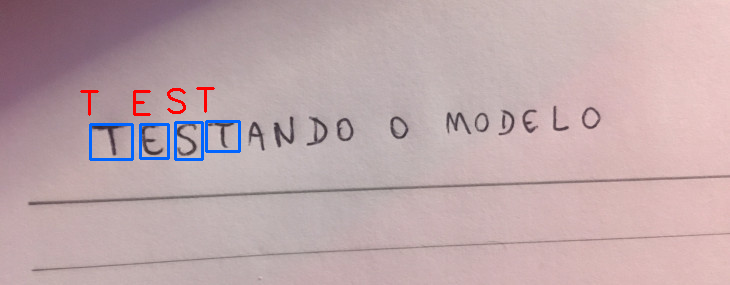

A  ->  99.99977350234985


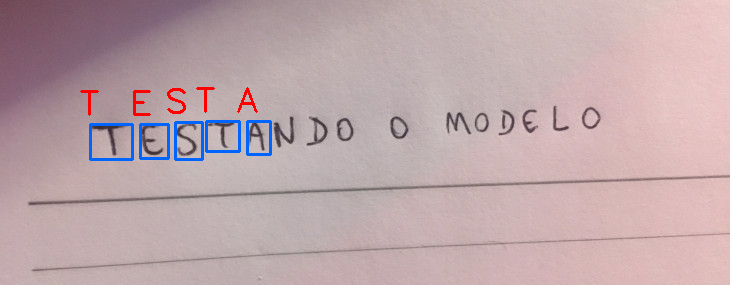

N  ->  99.98922348022461


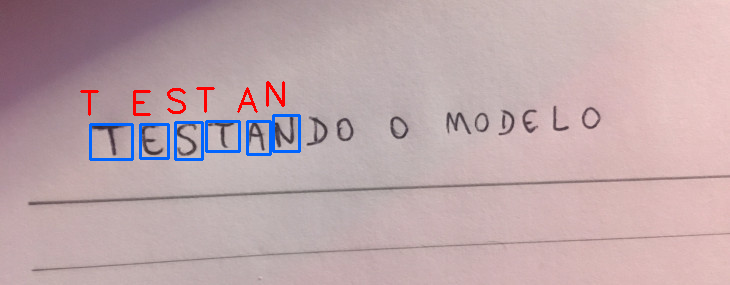

D  ->  99.99861717224121


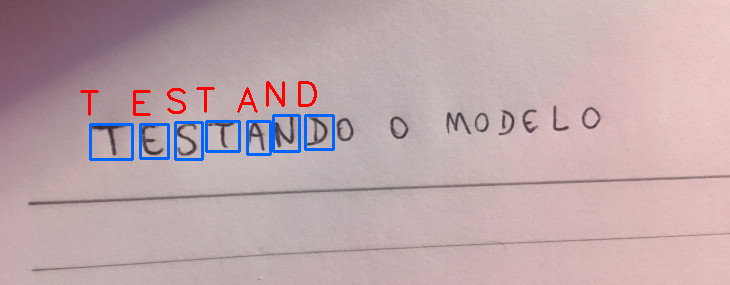

O  ->  43.00505816936493


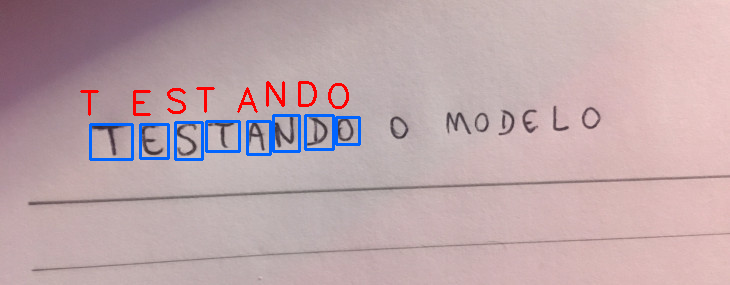

D  ->  82.38793611526489


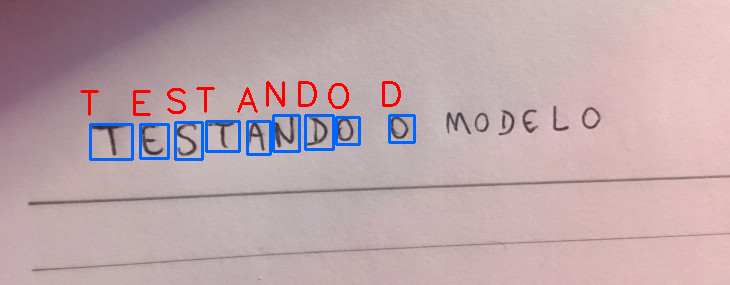

M  ->  99.85663294792175


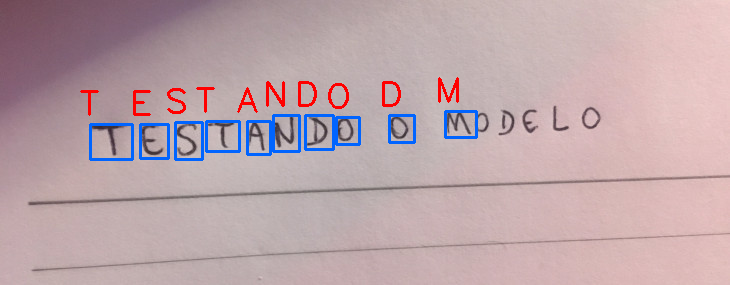

0  ->  98.01620244979858


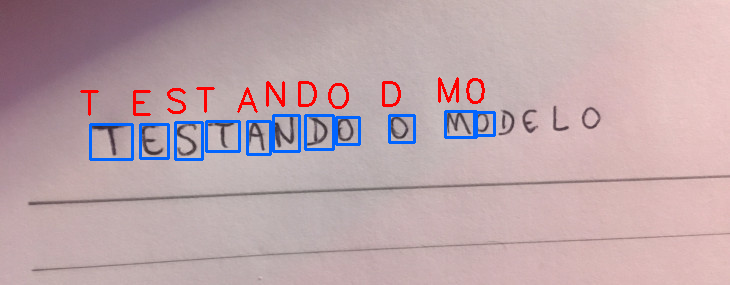

D  ->  99.84582662582397


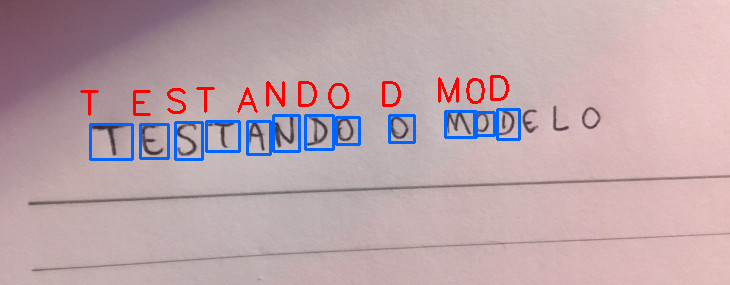

E  ->  98.45957159996033


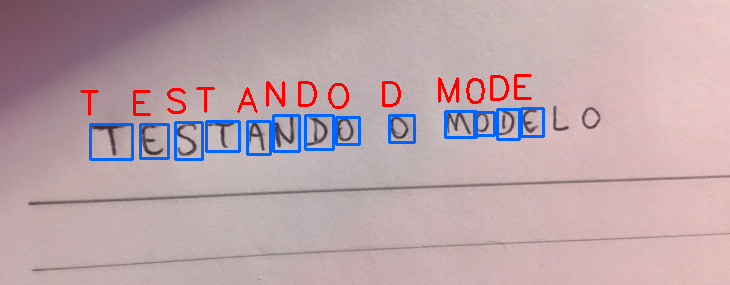

L  ->  99.99778270721436


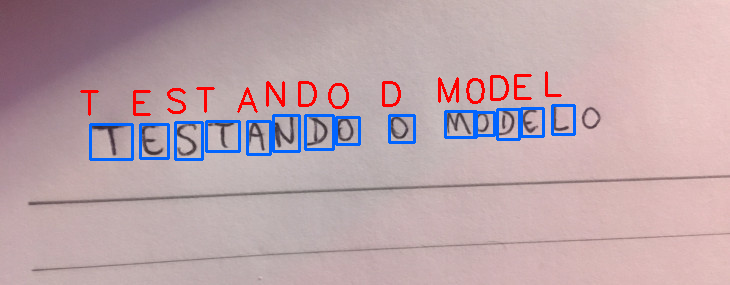

0  ->  71.64398431777954


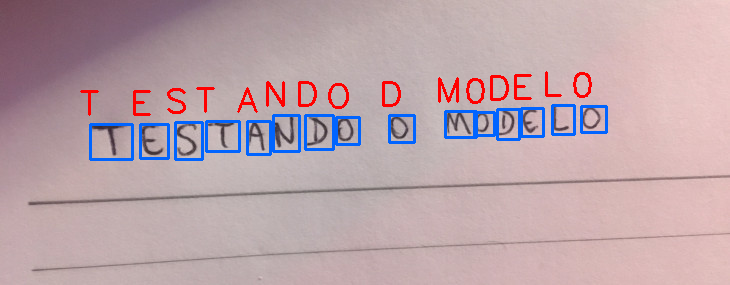

In [ ]:
img_copy = img.copy()
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  probability = prediction[i]
  character = characters_list[i]

  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(character, ' -> ', probability * 100)

  cv2_imshow(img_copy)

# Other tests

In [ ]:
def preprocess_img(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3, 3), 7)
  edges = cv2.Canny(blur, 40, 150)
  dilation = cv2.dilate(edges, np.ones((3,3)))
  return gray, dilation

In [ ]:
def prediction(predictions, characters_list):
  i = np.argmax(predictions)
  probability = predictions[i]
  character = characters_list[i]
  return i, probability, character

In [ ]:
def draw_img(img_cp, character):
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
  cv2.putText(img_cp, character, (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 2)

## Problems with 0 and O, 1 an I, 5 and S

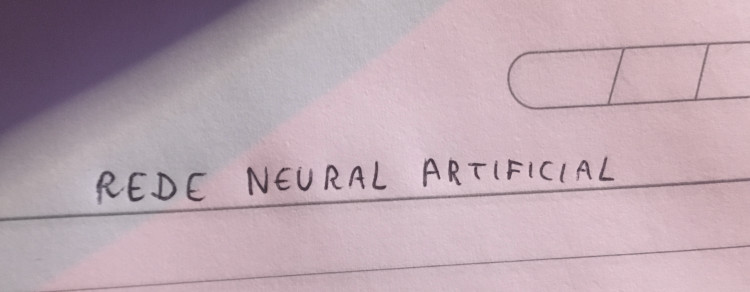

In [ ]:
img = cv2.imread('/content/test_manuscript02.jpg')
cv2_imshow(img)

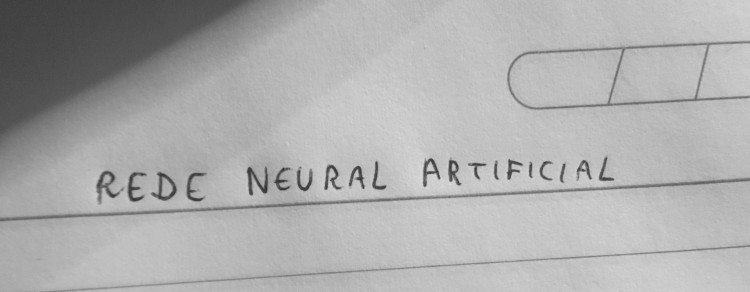

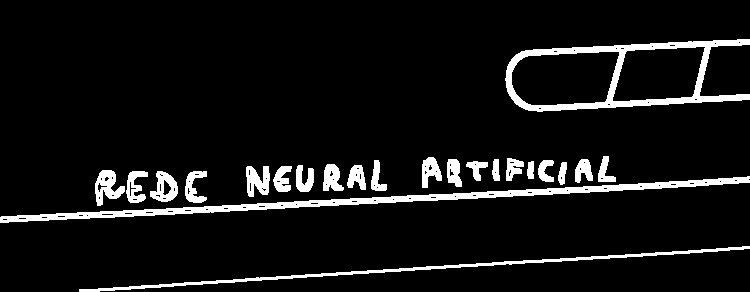

In [ ]:
gray, processed_img = preprocess_img(img)
cv2_imshow(gray)
cv2_imshow(processed_img)

In [ ]:
conts = find_contours(processed_img.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype="float32")
predictions = network.predict(pixels)

In [ ]:
digits_2 = 'OI234S6789'
letters_2 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list_2 = digits_2 + letters_2
characters_list_2 = [l for l in characters_list_2]

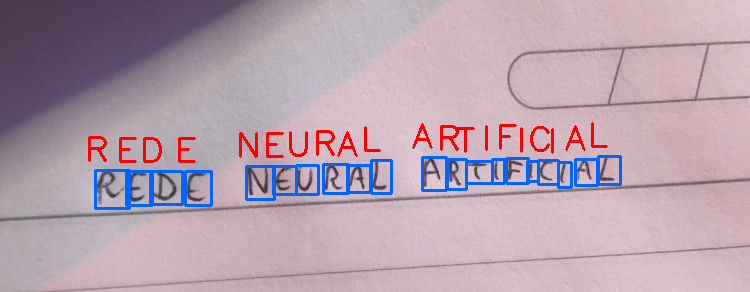

In [ ]:
img_cp = img.copy()
for (pred, (x, y, w, h)) in zip(predictions, boxes):
  i, probability, character = prediction(pred, characters_list_2)
  draw_img(img_cp, character)
cv2_imshow(img_cp)

## Problems with undetected texts

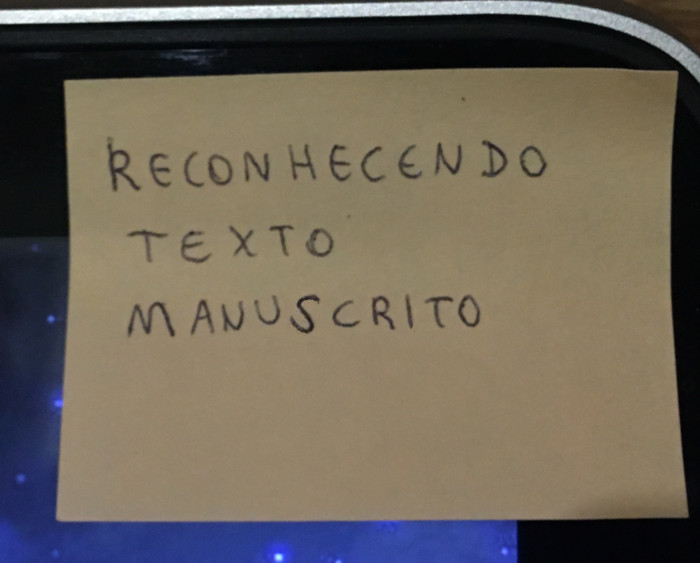

In [ ]:
img = cv2.imread('/content/test_manuscript03.jpg')
cv2_imshow(img)

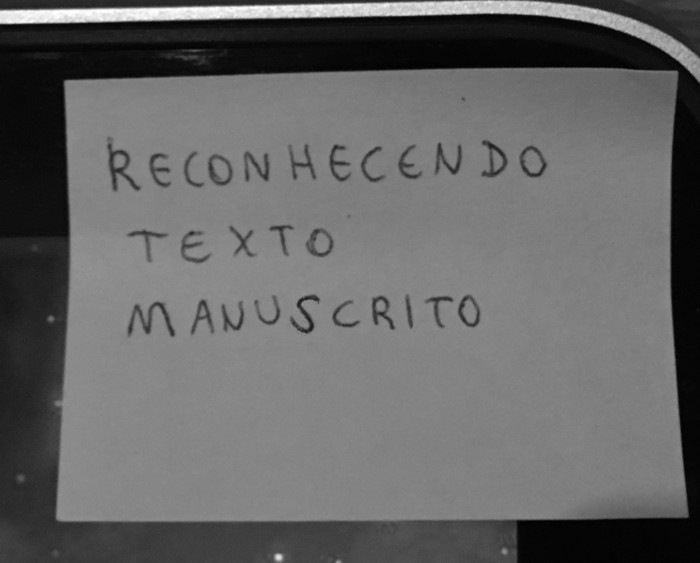

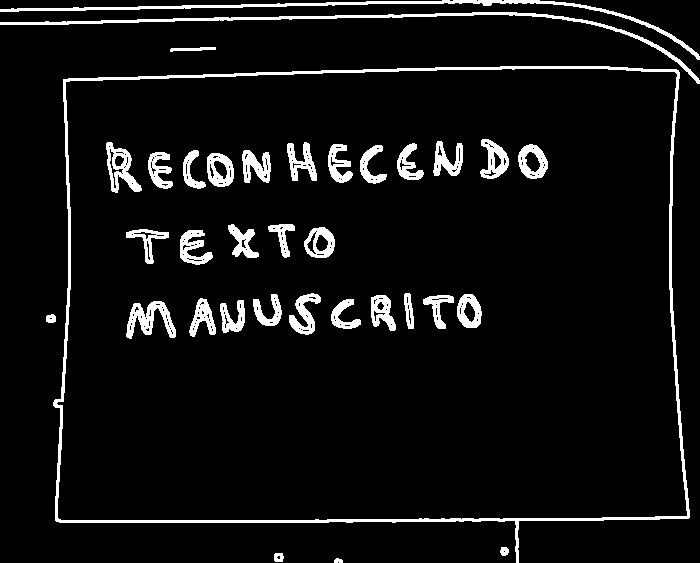

In [ ]:
gray, processed_img = preprocess_img(img)
cv2_imshow(gray)
cv2_imshow(processed_img)

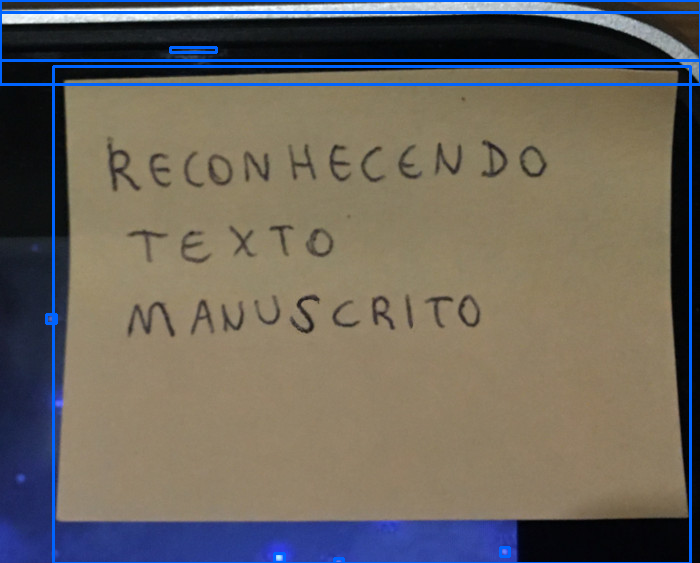

In [ ]:
conts = find_contours(processed_img.copy()) # RETR_EXTERNAL
img_cp = img.copy()
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  #if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):
  roi = gray[y:y + h, x:x + w]
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_cp)

In [ ]:
height, width = img.shape[:2]
print(height, width)

563 700


In [ ]:
contours_size = sorted(conts, key=cv2.contourArea, reverse=True)
contours_size

[array([[[500,  66]],
 
        [[499,  67]],
 
        [[435,  67]],
 
        [[434,  68]],
 
        [[397,  68]],
 
        [[396,  69]],
 
        [[363,  69]],
 
        [[362,  70]],
 
        [[321,  70]],
 
        [[320,  71]],
 
        [[292,  71]],
 
        [[291,  72]],
 
        [[256,  72]],
 
        [[255,  73]],
 
        [[234,  73]],
 
        [[233,  74]],
 
        [[203,  74]],
 
        [[202,  75]],
 
        [[167,  75]],
 
        [[166,  76]],
 
        [[138,  76]],
 
        [[137,  77]],
 
        [[ 98,  77]],
 
        [[ 97,  78]],
 
        [[ 68,  78]],
 
        [[ 67,  79]],
 
        [[ 63,  79]],
 
        [[ 63, 101]],
 
        [[ 64, 102]],
 
        [[ 64, 122]],
 
        [[ 65, 123]],
 
        [[ 65, 156]],
 
        [[ 66, 157]],
 
        [[ 66, 184]],
 
        [[ 67, 185]],
 
        [[ 67, 208]],
 
        [[ 68, 209]],
 
        [[ 68, 287]],
 
        [[ 67, 288]],
 
        [[ 67, 304]],
 
        [[ 66, 305]],
 
        [[ 66, 3

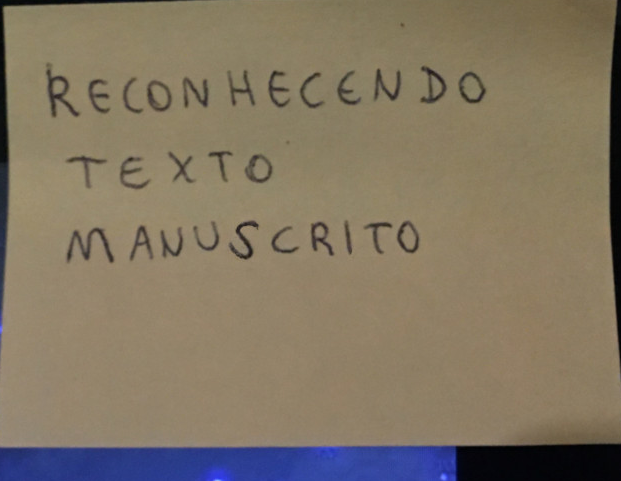

In [ ]:
for c in contours_size:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= (width / 2)) and (h >= height / 2):
    cut_off = 8
    cut_img = img[y+cut_off:y + h - cut_off, x+cut_off:x + w - cut_off]
    cv2_imshow(cut_img)

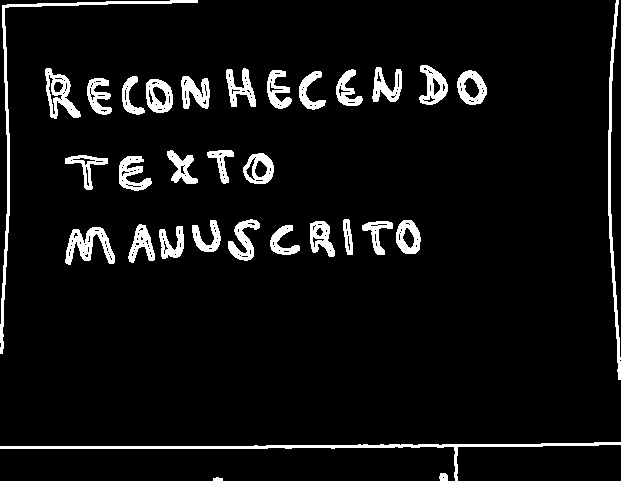

In [ ]:
gray, processed_img = preprocess_img(cut_img)
cv2_imshow(processed_img)

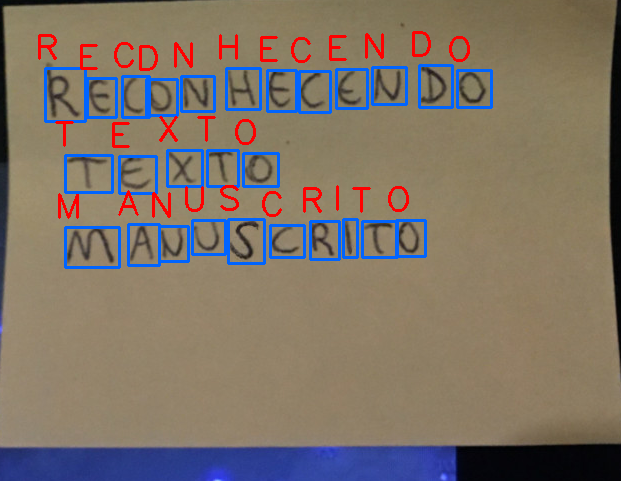

In [ ]:
conts = find_contours(processed_img.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype="float32")
predictions = network.predict(pixels)

img_cp = cut_img.copy()
for (pred, (x, y, w, h)) in zip(predictions, boxes):
  i, probability, character = prediction(pred, characters_list_2)
  draw_img(img_cp, character)
cv2_imshow(img_cp)